In [2]:
!pip install scikit-fuzzy

In [17]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [18]:

vehicle_density = ctrl.Antecedent (np.arange(0, 101, 1), 'vehicle_density') 
waiting_time = ctrl.Antecedent (np.arange(0, 31, 1), 'waiting_time') 
light_duration = ctrl.Consequent (np.arange(0, 61, 1), 'light_duration')

In [19]:

vehicle_density['low'] = fuzz.trapmf (vehicle_density.universe, [0, 0, 20, 40])
vehicle_density ['medium'] = fuzz.trimf (vehicle_density.universe, [20, 50, 80])
vehicle_density['high'] = fuzz.trapmf (vehicle_density.universe, [60, 80, 100, 100])

In [20]:
waiting_time['short'] = fuzz.trapmf (waiting_time.universe, [0, 0, 5, 10]) 
waiting_time['medium'] = fuzz.trimf (waiting_time. universe, [5, 15, 25]) 
waiting_time['long'] = fuzz.trapmf (waiting_time.universe, [20, 25, 30, 30])

In [21]:
light_duration['short'] = fuzz.trapmf (light_duration.universe, [0, 0, 10, 20])
light_duration['medium'] = fuzz.trimf (light_duration. universe, [10, 30, 50])
light_duration['long'] = fuzz.trapmf (light_duration.universe, [40, 50, 60,60])

In [22]:
rule1= ctrl.Rule (vehicle_density['low'] & waiting_time['short'], light_duration['short'])
rule2 = ctrl. Rule (vehicle_density ['low'] & waiting_time['medium'], light_duration['medium'])
rule3 = ctrl. Rule (vehicle_density [ 'low'] & waiting_time['long'], light_duration['medium'])
rule4 = ctrl. Rule (vehicle_density['medium'] & waiting_time['short'], light_duration['medium'])
rule5 = ctrl.Rule (vehicle_density ['medium'] & waiting_time['medium'], light_duration['medium'])
rule6 = ctrl.Rule (vehicle_density ['medium'] & waiting_time['long'], light_duration['long'])
rule7 = ctrl. Rule (vehicle_density ['high'] & waiting_time['short'], light_duration['medium'])
rule8 = ctrl.Rule (vehicle_density['high'] & waiting_time['medium'], light_duration['long']) 
rule9 = ctrl. Rule (vehicle_density['high'] & waiting_time['long'], light_duration['long'])

In [23]:
traffic_light_ctrl = ctrl.ControlSystem ([rule1, rule2, rule3, rule4, rule5,rule6, rule7, rule8, rule9])
traffic_light_sim = ctrl.ControlSystemSimulation (traffic_light_ctrl)

In [24]:
traffic_light_sim. input['vehicle_density'] = 70
traffic_light_sim. input['waiting_time'] = 15


In [25]:
traffic_light_sim.compute()

In [26]:
print(f"RECOMMENDED GREEN LIGHT DURATION: {traffic_light_sim.output['light_duration']} seconds")

RECOMMENDED GREEN LIGHT DURATION: 38.8676844783715 seconds


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


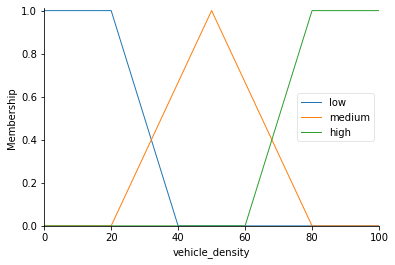

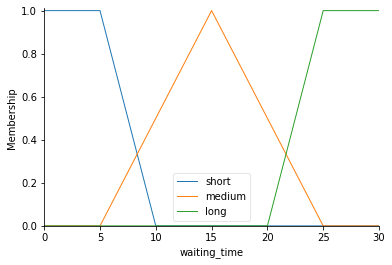

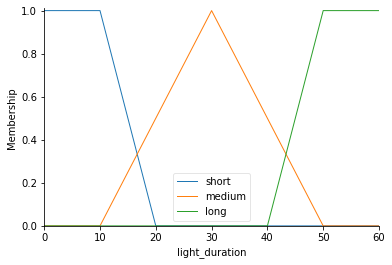

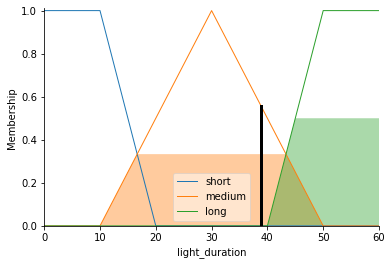

In [27]:
vehicle_density.view()
waiting_time.view()
light_duration.view()
light_duration.view(sim=traffic_light_sim)